# Hello world
and with this humble words, this masterpiece begin

In [157]:
# Let's load the data into memory
!python3 scripts/load_data.py

Path to dataset files: /home/s/.cache/kagglehub/datasets/ranadeep/credit-risk-dataset/versions/3


In [127]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score


# TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pickle  # Para guardar el pipeline
import joblib  # Para guardar el pipeline

# Import the KaggleHub library
import kagglehub
from kagglehub import KaggleDatasetAdapter


In [128]:
# Import the necessary functions from utilities.py
from scripts.utilities import get_preprocessor, get_pipeline

In [96]:
# Load a DataFrame with a specific version of a CSV
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "ranadeep/credit-risk-dataset/versions/3",
    "loan/loan.csv",
)

/home/s/code/unal/RNA/Trabajos/modelos-riesgo-credito/.venv/lib/python3.11/site-packages/kagglehub/pandas_datasets.py:92: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


In [129]:
pipeline = get_pipeline()

# Preprocess the data
preproccesed_df = pipeline.fit_transform(df)

In [102]:
columns_to_drop = [
    'loan_status',
    'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'initial_list_status', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'last_pymnt_amnt',
       'mths_since_last_major_derog', 'application_type', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m'
       ]

In [103]:
# Dividir los datos en variables predictoras (X) y la variable objetivo (y)
X = preproccesed_df.drop(columns= columns_to_drop)
y = preproccesed_df['loan_status'].astype(int)

In [130]:
# Let's check the data
print(f'Features: {len(X.columns)}')
X.columns

Features: 26


Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'dti', 'delinq_2yrs', 'revol_util',
       'total_acc', 'out_prncp', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [131]:
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns
categorical_columns

Index(['home_ownership', 'pymnt_plan'], dtype='object')

In [108]:
preprocessor = get_preprocessor(X)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

In [110]:
# Aplicar el preprocesamiento a los datos
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [112]:
# Let's check the shape of the data post-preprocessing
print(X_test_preprocessed.shape)
X_test_preprocessed

(177476, 32)


array([[ 1.09626793,  1.09860943,  1.10169584, ...,  0.        ,
         1.        ,  0.        ],
       [-1.18038229, -1.17954564, -1.17320552, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.85911687,  0.86130161,  0.86472695, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 2.40059879,  2.40380244,  2.40502475, ...,  1.        ,
         1.        ,  0.        ],
       [-0.61121974, -0.61000688, -0.60448018, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.21484346,  1.21726334,  1.22018029, ...,  1.        ,
         1.        ,  0.        ]])

In [113]:
# Construir el modelo de Keras
model = Sequential([
    Dense(64, input_dim=X_train_preprocessed.shape[1], activation='relu'),  # Capa de entrada con 64 neuronas
    Dense(32, activation='relu'),  # Capa oculta con 32 neuronas
    Dense(1, activation='sigmoid')  # Capa de salida (sigmoide para clasificación binaria)
])

/home/s/code/unal/RNA/Trabajos/modelos-riesgo-credito/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'recall'])

In [115]:
# Entrenar el modelo
model.fit(X_train_preprocessed, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10


2025-01-28 19:22:21.567684: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 90867584 exceeds 10% of free system memory.


22185/22185 ━━━━━━━━━━━━━━━━━━━━ 13s 571us/step - accuracy: 0.9692 - loss: 0.1197 - recall: 0.9982
Epoch 2/10
22185/22185 ━━━━━━━━━━━━━━━━━━━━ 13s 569us/step - accuracy: 0.9740 - loss: 0.1037 - recall: 0.9990
Epoch 3/10
22185/22185 ━━━━━━━━━━━━━━━━━━━━ 13s 569us/step - accuracy: 0.9745 - loss: 0.1015 - recall: 0.9990
Epoch 4/10
22185/22185 ━━━━━━━━━━━━━━━━━━━━ 13s 569us/step - accuracy: 0.9748 - loss: 0.1002 - recall: 0.9990
Epoch 5/10
22185/22185 ━━━━━━━━━━━━━━━━━━━━ 13s 573us/step - accuracy: 0.9744 - loss: 0.1007 - recall: 0.9987
Epoch 6/10
22185/22185 ━━━━━━━━━━━━━━━━━━━━ 13s 568us/step - accuracy: 0.9751 - loss: 0.0988 - recall: 0.9989
Epoch 7/10
22185/22185 ━━━━━━━━━━━━━━━━━━━━ 13s 568us/step - accuracy: 0.9751 - loss: 0.0986 - recall: 0.9987
Epoch 8/10
22185/22185 ━━━━━━━━━━━━━━━━━━━━ 13s 571us/step - accuracy: 0.9752 - loss: 0.0985 - recall: 0.9988
Epoch 9/10
22185/22185 ━━━━━━━━━━━━━━━━━━━━ 13s 570us/step - accuracy: 0.9752 - loss: 0.0983 - recall: 0.9988
Epoch 10/10
22185/221

In [116]:
# Hacer predicciones
y_pred = (model.predict(X_test_preprocessed) > 0.5).astype("int32")
# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))

5547/5547 ━━━━━━━━━━━━━━━━━━━━ 2s 301us/step
              precision    recall  f1-score   support

           0       0.97      0.68      0.80     13324
           1       0.97      1.00      0.99    164152

    accuracy                           0.97    177476
   macro avg       0.97      0.84      0.89    177476
weighted avg       0.97      0.97      0.97    177476



In [117]:
# Save the preprocessor
filename = 'preprocessor.pkl'
with open(filename, 'wb') as f:
    pickle.dump(preprocessor, f)

# Save the model to disk with pickle
filename = 'model.pkl'
joblib.dump(model, filename)

['model.pkl']

# Explore a little bit

In [156]:
# Let's see all the values in the categorical_columns
print(X['home_ownership'].value_counts())
print('\n')
print(X['pymnt_plan'].value_counts()) # very unbalanced btw

home_ownership
MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: count, dtype: int64


pymnt_plan
n    887369
y        10
Name: count, dtype: int64


In [118]:
# define a variable to store a random row from the test set
column_data = X_test.iloc[10000]
print(len(column_data))
column_data

26


loan_amnt                      13000.0
funded_amnt                    13000.0
funded_amnt_inv                13000.0
term                               0.0
int_rate                          8.39
installment                     409.72
sub_grade                          7.0
home_ownership                MORTGAGE
annual_inc                     85000.0
verification_status                0.0
pymnt_plan                           n
dti                               20.1
delinq_2yrs                        0.0
revol_util                        91.0
total_acc                         34.0
out_prncp                      6545.54
total_rec_prncp                6454.46
total_rec_int                  1330.22
total_rec_late_fee                 0.0
recoveries                         0.0
collection_recovery_fee            0.0
collections_12_mths_ex_med         0.0
policy_code                        1.0
acc_now_delinq                     0.0
tot_cur_bal                   214810.0
total_rev_hi_lim         

In [119]:
# transform with the preprocessor
input_data = preprocessor.transform(column_data.to_frame().T)
input_data

array([[-0.20806293, -0.20658358, -0.20163306, -0.65492397, -1.10839308,
        -0.11041772,  1.07176681,  0.14995949, -1.52445636,  0.13436668,
        -0.36421949,  1.50720021,  0.73739105, -0.21881011,  0.10573753,
        -0.20265669, -0.09767804, -0.11179785, -0.07633923, -0.10798593,
         0.        , -0.06358984,  0.53930447,  0.39374084,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ]])

In [120]:
# make a prediction with the model just a test row
model.predict(input_data).item()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


0.9894030094146729

In [124]:
# score
roc_score = roc_auc_score(y_test, model.predict(X_test_preprocessed))
print(f'ROC AUC score: {roc_score}')


5547/5547 ━━━━━━━━━━━━━━━━━━━━ 2s 298us/step
ROC AUC score: 0.935627846767702


5547/5547 ━━━━━━━━━━━━━━━━━━━━ 2s 300us/step


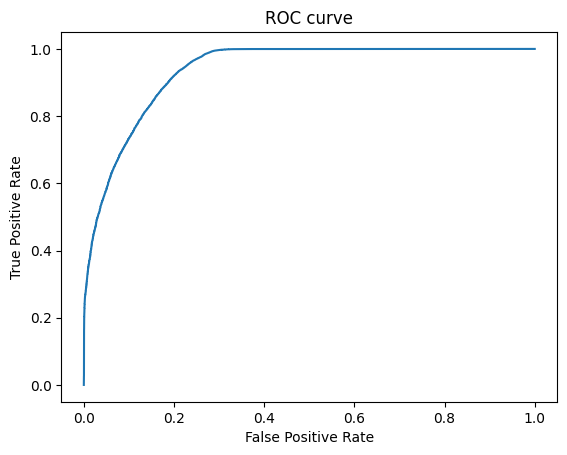

In [125]:
# curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test_preprocessed))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()